# Fundamentals of fMRI data analysis 
## General Linear Model 2


In this assignment, your task is to run simple GLM analysis on fMRI data in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 25-01-2021

-------------------

## Task 1



Repeat all analyses performed on our last classes (code [HERE](https://github.com/fMRIAnalysisCourse/fmri-analysis-course/blob/master/04-general_linear_model/glm_on_fMRI_data.ipynb)) on the second subject in our dataset (`sub-02`). Explore different plotting possibilities available at `plot_stat_map` method (documentation [HERE](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_stat_map.html)). Also check tutorial [HERE](https://nilearn.github.io/auto_examples/01_plotting/plot_demo_more_plotting.html#sphx-glr-auto-examples-01-plotting-plot-demo-more-plotting-py). Add 6 motion parameters to your design matrix.



In [129]:
# Code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_design_matrix, plot_contrast_matrix, plot_prob_atlas, show, view_img
from nistats.thresholding import map_threshold
from nistats.reporting import get_clusters_table
from nilearn.plotting import plot_glass_brain
from nilearn.image import iter_img
from nilearn.glm import threshold_stats_img

In [3]:
events_path = "../03-fmri_data_preprocessing/fMRI_BIDS_rhymejudgment/sub-02/func/sub-02_task-rhymejudgment_events.tsv"
events = pd.read_csv(events_path, sep="\t")
events

,onset,duration,trial_type
0,20.001,2.0,pseudoword
1,22.501,2.0,pseudoword
2,25.001,2.0,pseudoword
3,27.501,2.0,pseudoword
4,30.001,2.0,pseudoword
...,...,...,...
59,307.510,2.0,word
60,310.010,2.0,word
61,312.511,2.0,word
62,315.011,2.0,word


In [8]:
fmri_img = "../03-fmri_data_preprocessing/fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-02/func/sub-02_task-rhymejudgment_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

confounds_path = "../03-fmri_data_preprocessing/fMRI_BIDS_rhymejudgment/derivatives/fmriprep/sub-02/func/sub-02_task-rhymejudgment_desc-confounds_regressors.tsv"
confounds = pd.read_csv(confounds_path, sep="\t")
confounds

,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,white_matter_derivative1_power2,white_matter_power2,global_signal,global_signal_derivative1,...,rot_x_derivative1_power2,rot_x_power2,rot_y,rot_y_derivative1,rot_y_derivative1_power2,rot_y_power2,rot_z,rot_z_derivative1,rot_z_derivative1_power2,rot_z_power2
0,653.238121,NaN,426720.042788,NaN,628.051221,NaN,NaN,394448.336070,575.078935,NaN,...,NaN,0.000000e+00,-0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,0.000000e+00
1,642.469544,-10.768577,412767.115603,115.962241,626.450219,-1.601002,2.563208,392439.876505,572.004130,-3.074805,...,6.250000e-08,6.250000e-08,0.000781,0.000781,6.104828e-07,6.104828e-07,0.000226,0.000226,5.101138e-08,5.101138e-08
2,637.997413,-4.472132,407040.698492,19.999964,627.212363,0.762144,0.580864,393395.348015,571.797105,-0.207025,...,1.808546e-09,4.304505e-08,0.001009,0.000228,5.204603e-08,1.019030e-06,0.000333,0.000107,1.142911e-08,1.107319e-07
3,637.201918,-0.795495,406026.284307,0.632812,626.383344,-0.829019,0.687273,392356.093296,572.011971,0.214866,...,3.646227e-07,6.582288e-07,0.001009,0.000000,0.000000e+00,1.019030e-06,0.000000,-0.000333,1.107319e-07,0.000000e+00
4,636.481164,-0.720754,405108.272629,0.519486,626.134031,-0.249313,0.062157,392043.824469,572.296761,0.284790,...,8.236269e-08,2.749157e-07,0.000959,-0.000050,2.543891e-09,9.197443e-07,0.000000,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,641.100455,-3.163584,411009.793038,10.008261,626.825241,0.415301,0.172475,392909.883055,569.792260,-0.343243,...,8.390560e-09,1.459844e-04,0.000932,-0.000648,4.195192e-07,8.680966e-07,-0.011345,-0.000330,1.089000e-07,1.287181e-04
156,641.682634,0.582179,411756.602949,0.338933,626.726282,-0.098960,0.009793,392785.832117,569.807693,0.015433,...,3.713329e-08,1.506781e-04,0.001461,0.000530,2.805323e-07,2.135602e-06,-0.010714,0.000631,3.986660e-07,1.147898e-04
157,643.432141,1.749507,414004.920549,3.060776,626.150926,-0.575355,0.331034,392064.982498,569.763735,-0.043958,...,8.798440e-07,1.745860e-04,0.001567,0.000106,1.121269e-08,2.456304e-06,-0.011337,-0.000623,3.885029e-07,1.285344e-04
158,643.896659,0.464517,414602.906936,0.215776,626.452586,0.301660,0.090999,392442.842787,569.787944,0.024209,...,4.036061e-07,1.582011e-04,0.002022,0.000455,2.068339e-07,4.088686e-06,-0.010812,0.000526,2.762554e-07,1.168929e-04


In [10]:
time_r = 2

first_level_model = FirstLevelModel(time_r, 
                                    hrf_model='spm', 
                                    high_pass=.01,
                                    smoothing_fwhm=6)

first_level_model = first_level_model.fit(fmri_img, events=events)

design_matrix = first_level_model.design_matrices_[0]

design_matrix.head()

,pseudoword,word,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


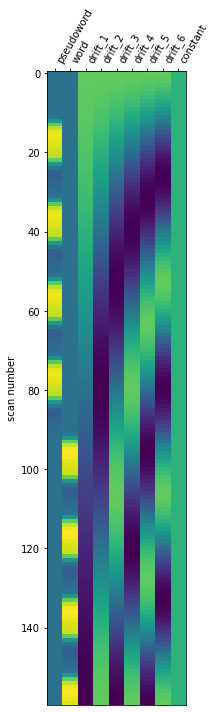

In [11]:
plot_design_matrix(design_matrix)

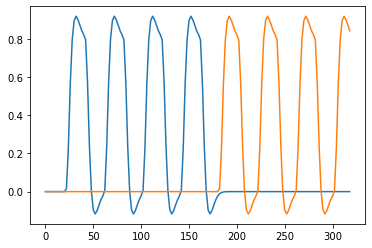

In [12]:
plt.plot(design_matrix[['pseudoword', 'word']])

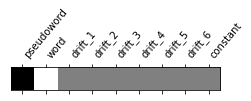

In [64]:
conditions = {'pseudoword': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0]), 
              'word': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])}
word_effect = conditions['word']

pseudoword_minus_word = conditions['pseudoword'] - conditions['word']

plot_contrast_matrix(pseudoword_minus_word, design_matrix)

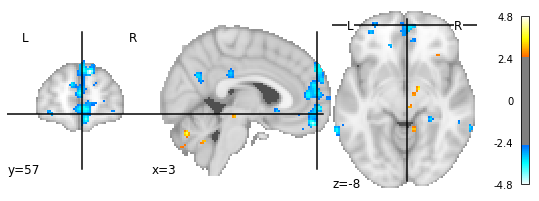

In [65]:
z_map_minus = first_level_model.compute_contrast(pseudoword_minus_word,
                                  output_type='z_score')

plot_stat_map(z_map_minus, threshold=2.581)

Corrected p<0.05 threshold for z_map_minus: 5.168


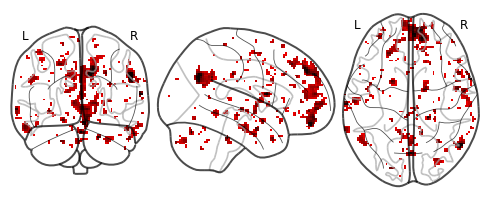

In [68]:
_, threshold = map_threshold(z_map_minus, alpha=.05, height_control='bonferroni')
print('Corrected p<0.05 threshold for z_map_minus: %.3f' % threshold)

plot_glass_brain(z_map_minus, threshold=2.9)

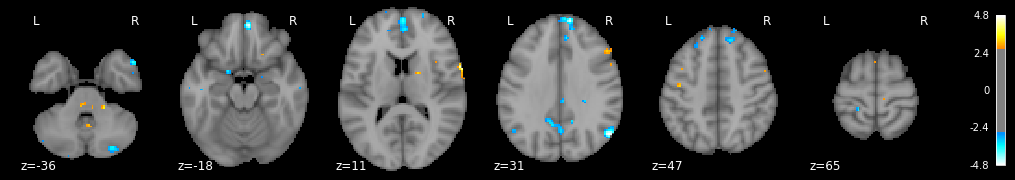

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,63.5,7.5,11.5,4.413720,160
1,1a,65.5,-0.5,11.5,2.990641,
2,2,1.5,-72.5,-28.5,4.385337,272
3,3,7.5,-24.5,-10.5,3.811338,176
4,4,17.5,-2.5,1.5,3.766279,472
5,4a,15.5,-4.5,-6.5,3.748018,
6,4b,17.5,1.5,11.5,3.350661,
7,5,51.5,25.5,33.5,3.761702,176
8,6,-42.5,-0.5,55.5,3.592381,328
9,6a,-40.5,-12.5,47.5,3.274532,


In [71]:
plot_stat_map(z_map_minus, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

table_minus = get_clusters_table(z_map_minus, stat_threshold=threshold,
                           cluster_threshold=20)
table_minus

# ----------------------------------------------------------------------

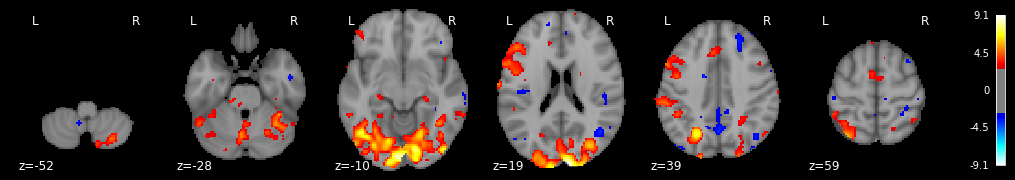

In [67]:
z_map_b = first_level_model.compute_contrast(word_effect,
                                  output_type='z_score')

plot_stat_map(z_map_b, threshold=2.759,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Corrected p<0.05 threshold for z_map_b: 2.759


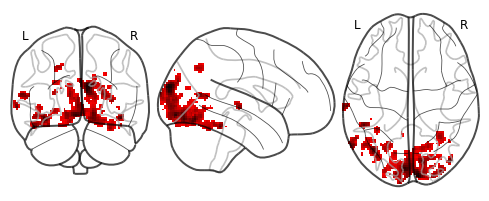

In [70]:
_, threshold = map_threshold(z_map_b, alpha=.05, height_control='fdr')
print('Corrected p<0.05 threshold for z_map_b: %.3f' % threshold)

plot_glass_brain(z_map_b, threshold=5.759)

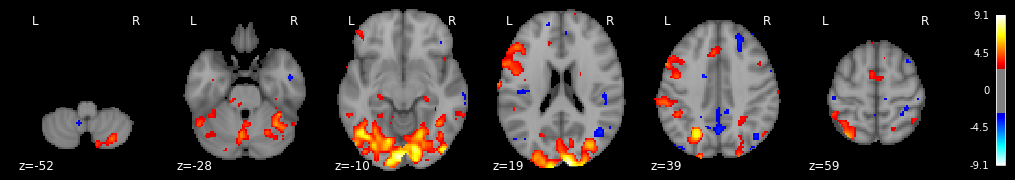

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,9.5,-96.5,19.5,9.060338,128400
1,1a,-4.5,-88.5,-10.5,8.527676,
2,1b,-38.5,-68.5,-14.5,8.308319,
3,1c,43.5,-80.5,-14.5,8.230032,
4,2,-66.5,-22.5,-2.5,7.970833,1232
5,3,-22.5,-64.5,39.5,7.063848,13736
6,3a,-30.5,-66.5,59.5,5.723575,
7,3b,-24.5,-58.5,53.5,5.566724,
8,3c,-52.5,-30.5,35.5,5.469659,
9,4,-46.5,29.5,13.5,5.584230,12184


In [72]:
plot_stat_map(z_map_b, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

table_b = get_clusters_table(z_map_b, stat_threshold=threshold,
                           cluster_threshold=20)
table_b

C:\Users\DOM\anaconda3\lib\site-packages\nilearn\plotting\displays.py:97: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


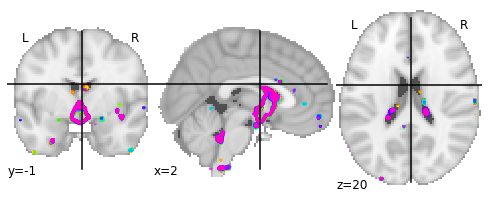

In [93]:
plot_prob_atlas(fmri_img)

C:\Users\DOM\anaconda3\lib\site-packages\nilearn\plotting\displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,
C:\Users\DOM\anaconda3\lib\site-packages\nilearn\plotting\displays.py:607: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


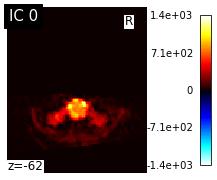

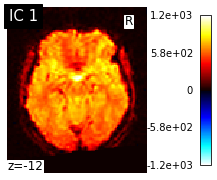

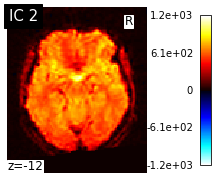

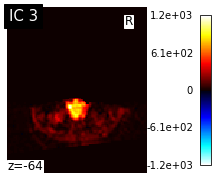

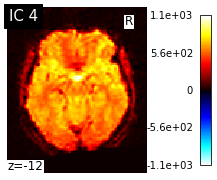

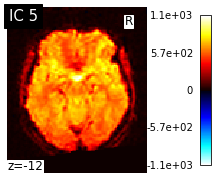

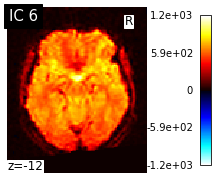

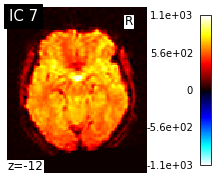

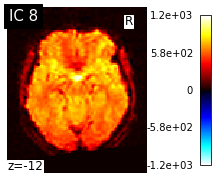

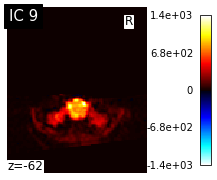

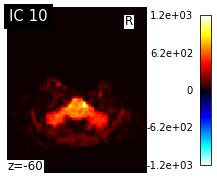

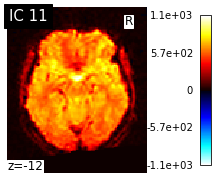

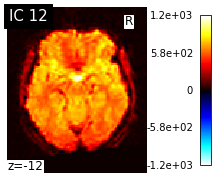

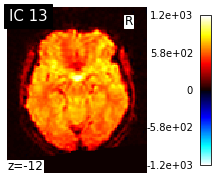

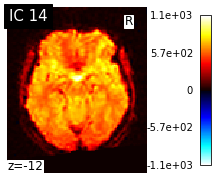

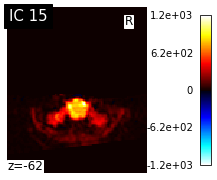

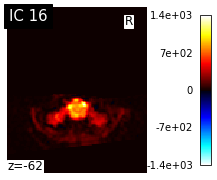

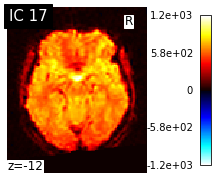

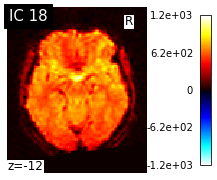

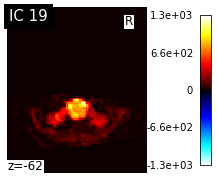

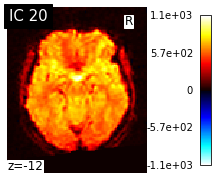

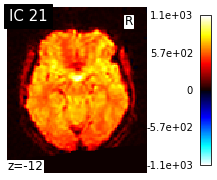

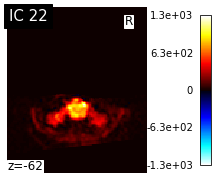

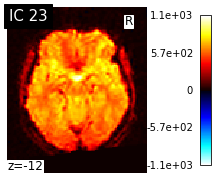

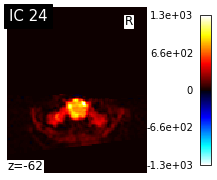

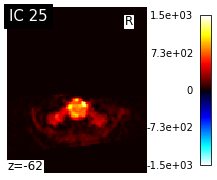

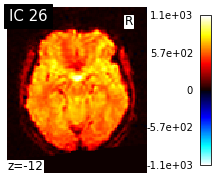

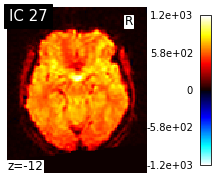

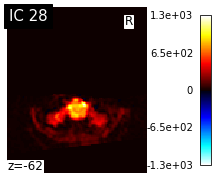

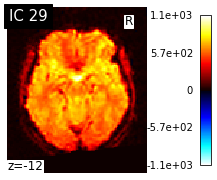

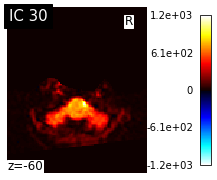

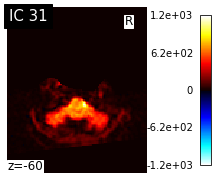

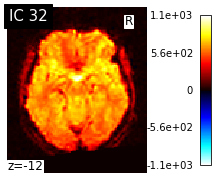

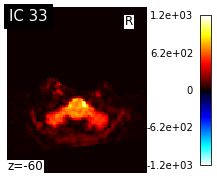

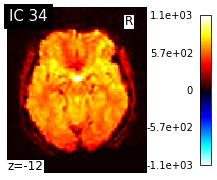

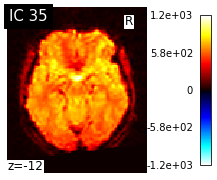

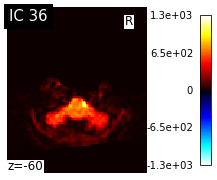

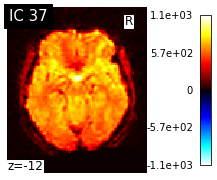

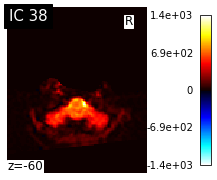

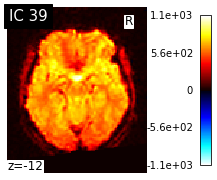

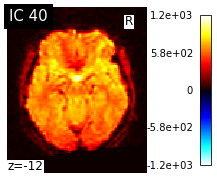

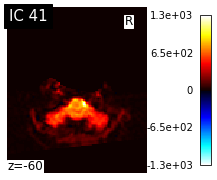

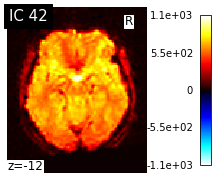

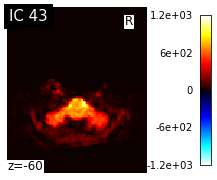

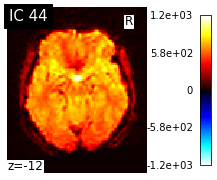

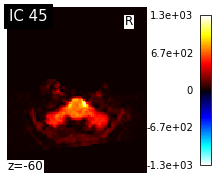

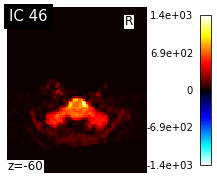

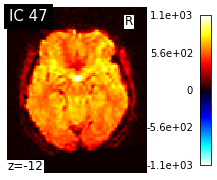

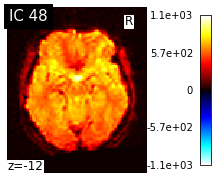

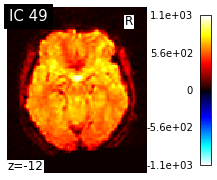

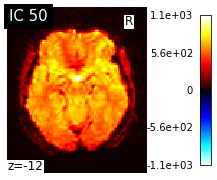

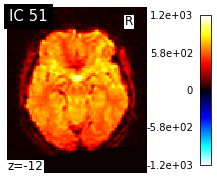

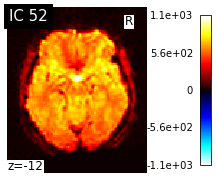

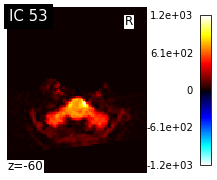

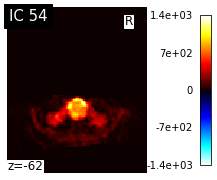

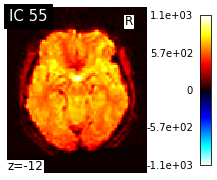

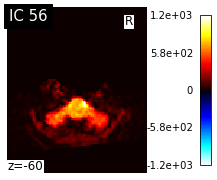

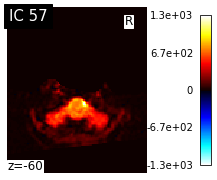

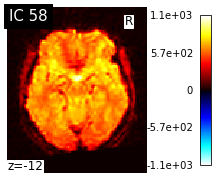

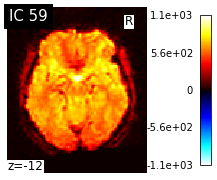

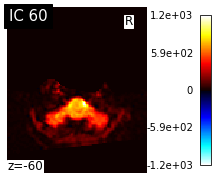

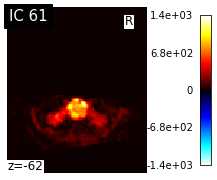

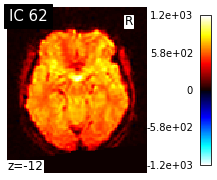

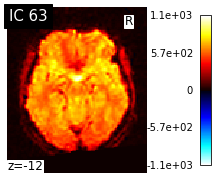

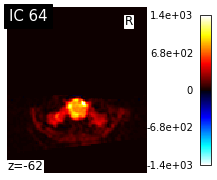

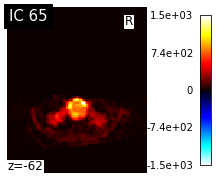

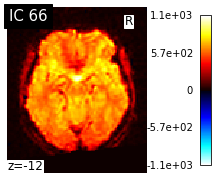

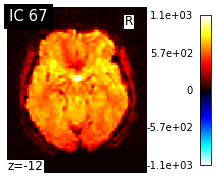

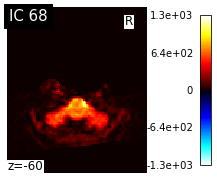

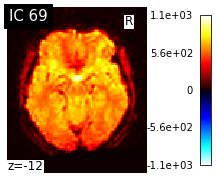

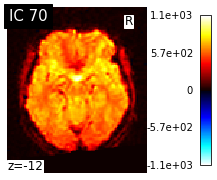

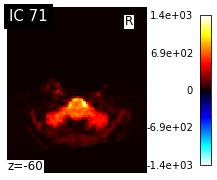

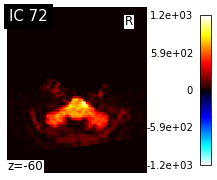

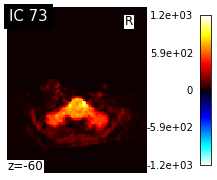

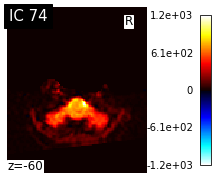

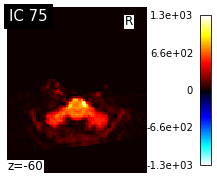

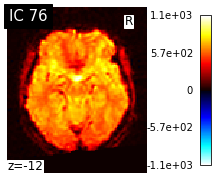

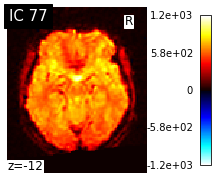

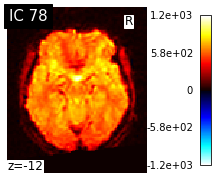

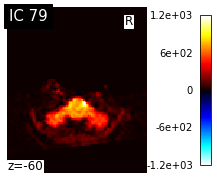

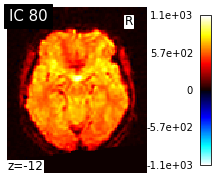

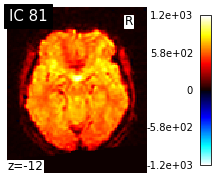

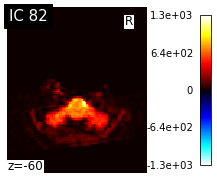

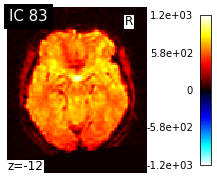

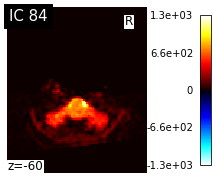

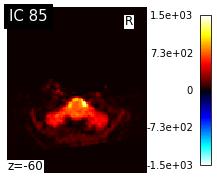

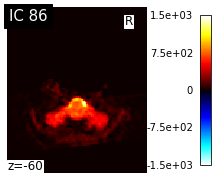

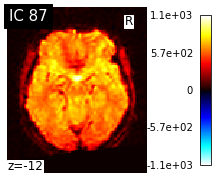

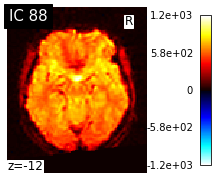

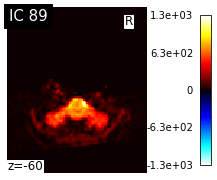

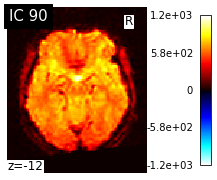

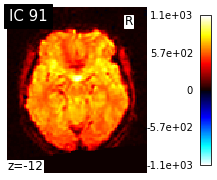

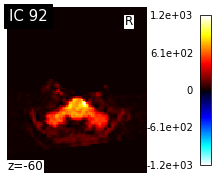

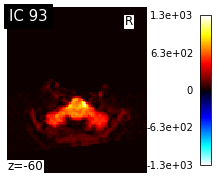

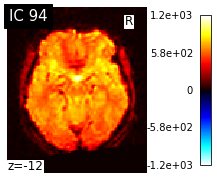

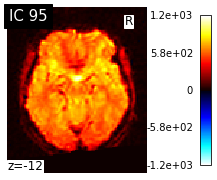

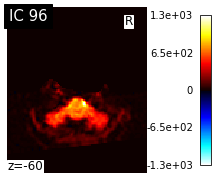

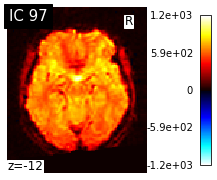

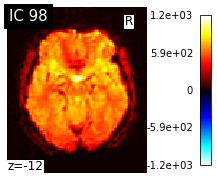

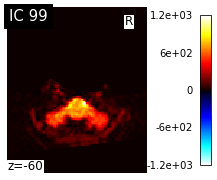

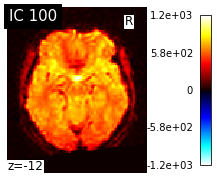

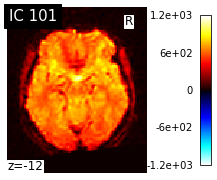

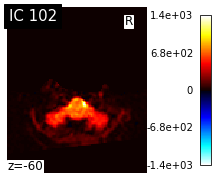

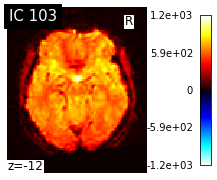

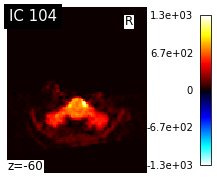

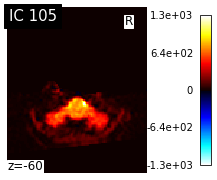

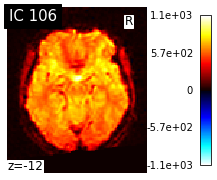

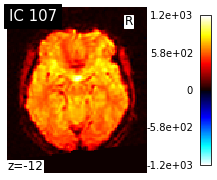

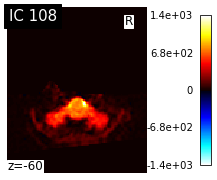

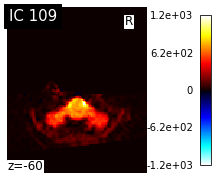

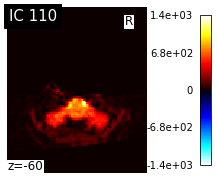

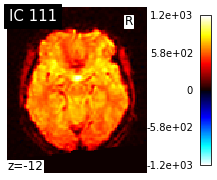

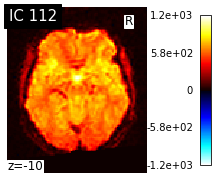

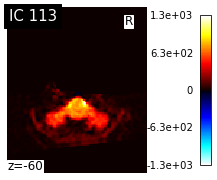

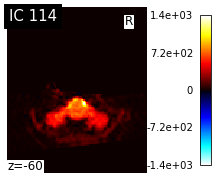

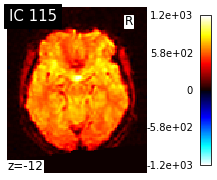

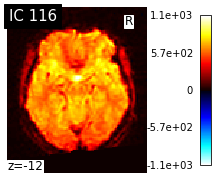

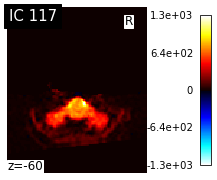

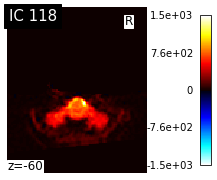

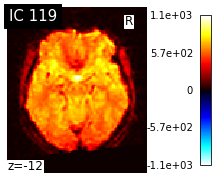

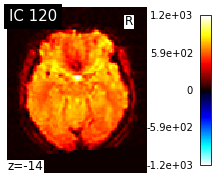

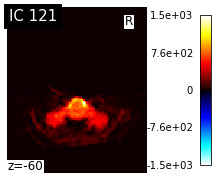

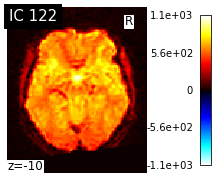

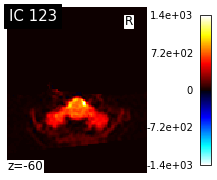

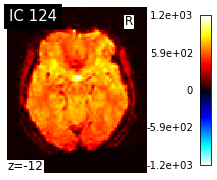

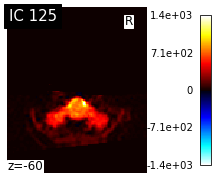

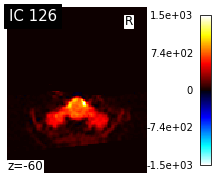

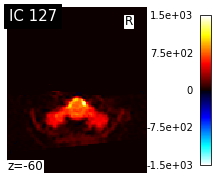

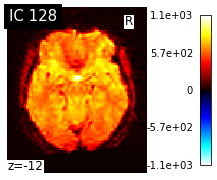

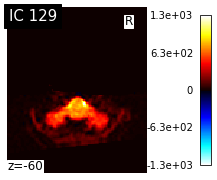

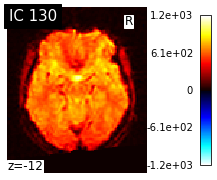

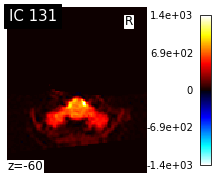

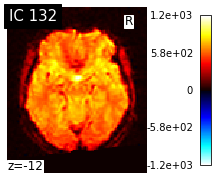

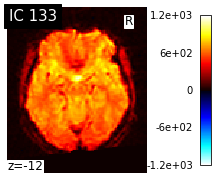

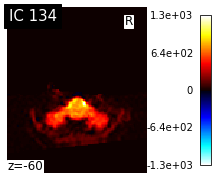

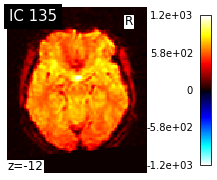

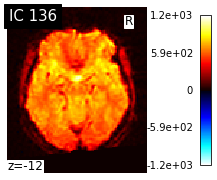

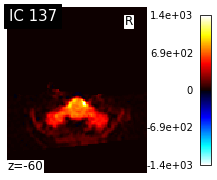

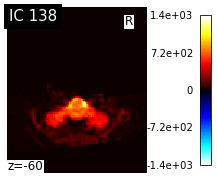

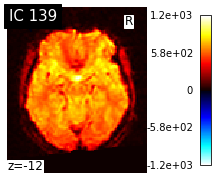

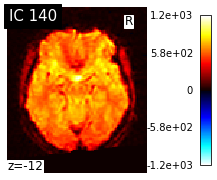

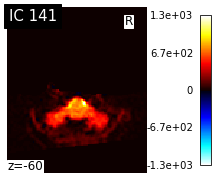

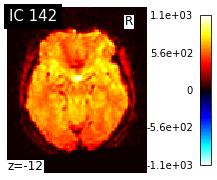

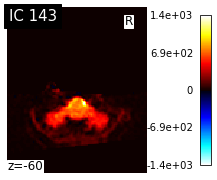

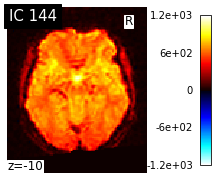

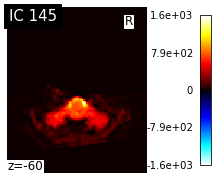

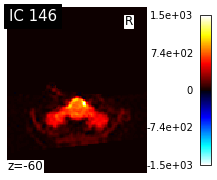

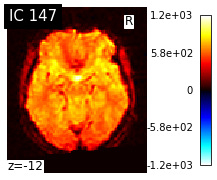

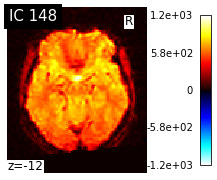

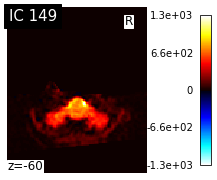

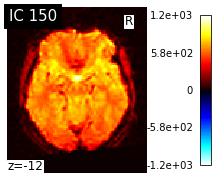

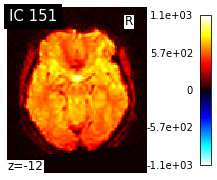

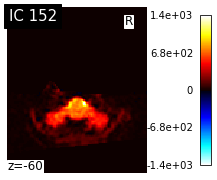

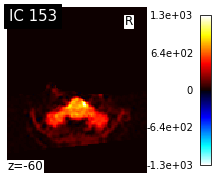

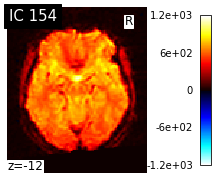

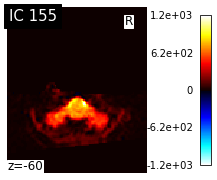

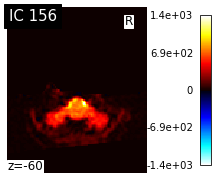

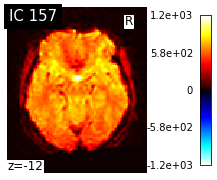

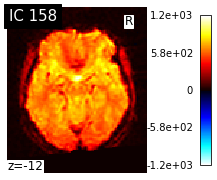

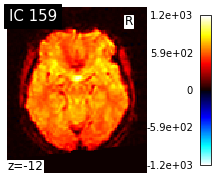

In [95]:
for i, cur_img in enumerate(iter_img(fmri_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=True)

In [130]:
thresholded_map1, threshold1 = threshold_stats_img(
    z_map_minus, alpha=.001, height_control='fpr', cluster_threshold=10)
print('False positive rate < .001, cluster size > 10 voxels; threshold: %.3f' % threshold1)

False positive rate < .001, cluster size > 10 voxels; threshold: 3.291


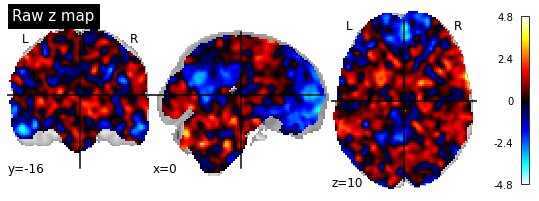

In [132]:
display = plot_stat_map(z_map_minus, title='Raw z map')

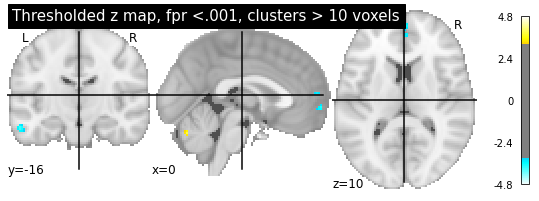

In [133]:
plot_stat_map(thresholded_map1, cut_coords=display.cut_coords, 
              threshold=threshold1, 
              title='Thresholded z map, fpr <.001, clusters > 10 voxels')

## 6 motion parameters

In [74]:
motion = confounds[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]
first_level_model_motion = first_level_model.fit(fmri_img, events=events, confounds=motion)

d_m_motion = first_level_model.design_matrices_[0]

d_m_motion.head()

,pseudoword,word,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,constant
0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.111798,0.111782,0.111755,0.111717,0.111669,0.111609,1.0
2.0,0.0,0.0,0.018734,-0.000013,0.029539,-0.000250,0.000781,0.000226,0.111755,0.111609,0.111367,0.111028,0.110593,0.110062,1.0
4.0,0.0,0.0,0.016760,0.023149,0.060931,-0.000207,0.001009,0.000333,0.111669,0.111265,0.110593,0.109655,0.108453,0.106989,1.0
6.0,0.0,0.0,-0.004947,0.023730,0.034745,-0.000811,0.001009,0.000000,0.111539,0.110749,0.109436,0.107606,0.105268,0.102433,1.0
8.0,0.0,0.0,-0.002534,0.012633,0.060961,-0.000524,0.000959,0.000000,0.111367,0.110062,0.107899,0.104893,0.101069,0.096457,1.0


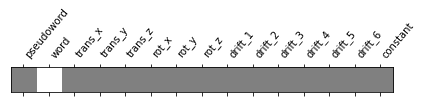

In [76]:
con_motion = {'pseudoword': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 
              'word': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
              'trans_x': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

word_minus_pseudoword_motion = con_motion['word'] - con_motion['pseudoword']
word_effect_motion = con_motion['word']
trans_x = con_motion['trans_x']

plot_contrast_matrix(word_effect_motion, design_matrix=d_m_motion)

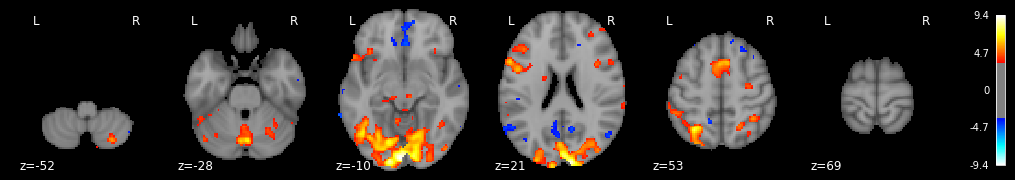

In [79]:
z_map_motion = first_level_model.compute_contrast(word_effect_motion,
                                  output_type='z_score')
plot_stat_map(z_map_motion, threshold=3.593,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

Corrected p<0.05 threshold: 2.529


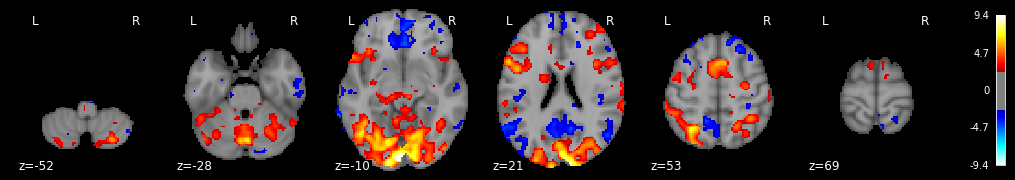

In [86]:
_, threshold = map_threshold(z_map_motion, alpha=.05, height_control='fdr')
print('Corrected p<0.05 threshold: %.3f' % threshold)

plot_stat_map(z_map_motion, threshold=threshold,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()

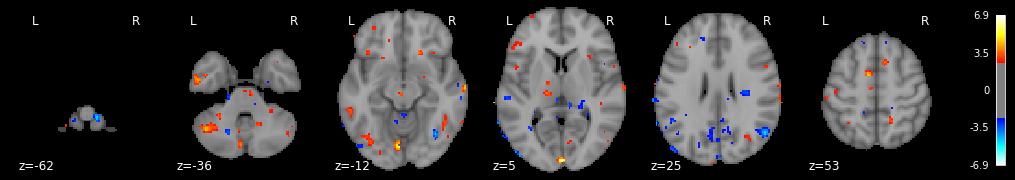

In [83]:
z_map_motion_trans_x = first_level_model.compute_contrast(trans_x,
                                  output_type='z_score')
plot_stat_map(z_map_motion_trans_x, threshold=2.593,
              display_mode='z', cut_coords=6, black_bg=True)
plt.show()